# Clean the Data

## Folium is used to create nice interactive maps

In [1]:
#folium is a Python Library to create maps
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [ ]:
## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import folium


In [ ]:
## get the data from file

In [3]:
# importing raw data
df_overview = pd.read_csv('data/Joined_Query.csv')

## Check and get familiar with the data provided

In [4]:
df_overview.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


In [5]:
df_overview.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [6]:
df_overview.tail()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0
21596,1523300157,2.0,0.75,1020.0,1076.0,2.0,0.0,0.0,3,7,...,0.0,2008,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014-10-15,325000.0


In [7]:
df_overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [8]:
df_overview.duplicated().value_counts()


False    21597
Name: count, dtype: int64

## Convert date from string to timestamp

In [9]:
type(df_overview['date'][0])

str

In [10]:
df_overview['date'] = pd.to_datetime(df_overview['date'])

In [11]:
df_overview.dtypes

id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
dtype: object

In [12]:
df_overview.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


In [13]:
type(df_overview['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

## Review for missing data, empty rows, etc.

In [14]:
df_overview.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

<Axes: >

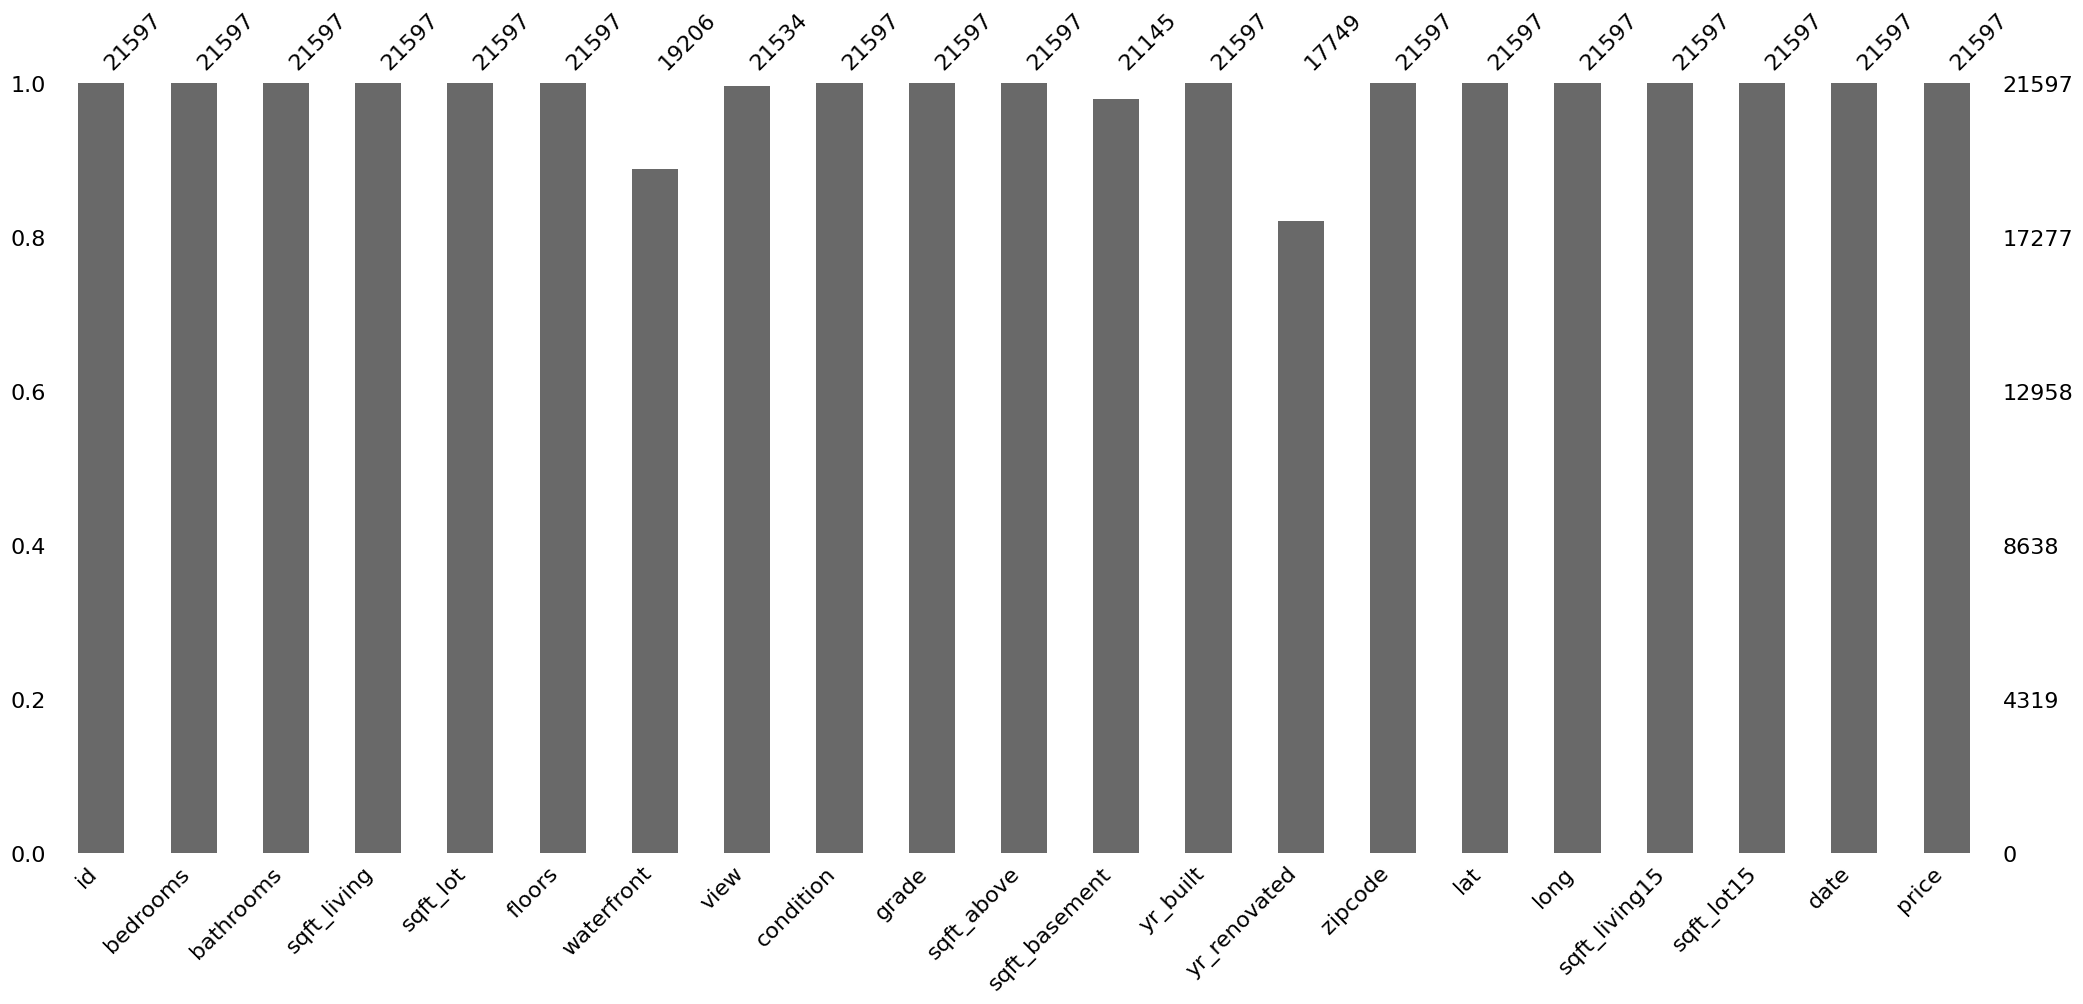

In [15]:
msno.bar(df_overview)

<Axes: >

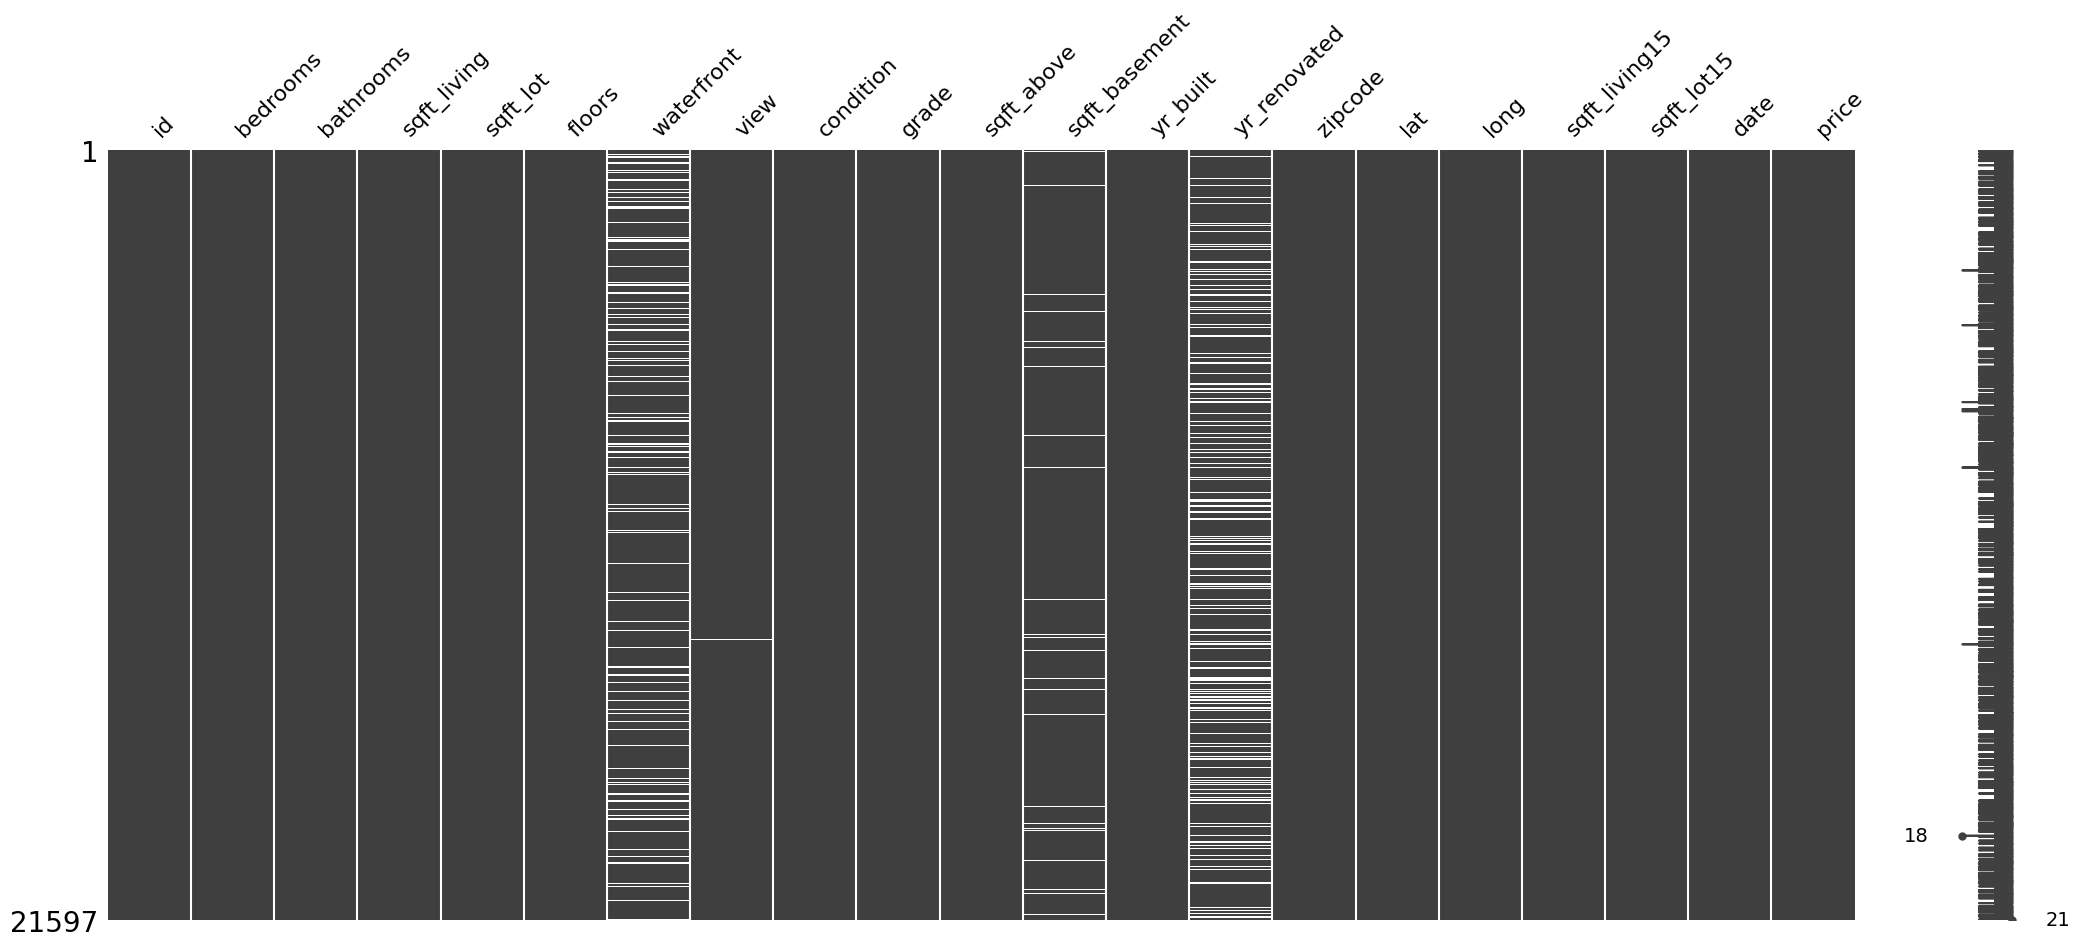

In [16]:
msno.matrix(df_overview)

In [23]:
df_overview['waterfront'].isna().sum()

np.int64(2391)

In [24]:
df_overview['view'].isna().sum()

np.int64(63)

In [25]:
df_overview['sqft_basement'].isna().sum()


np.int64(452)

In [26]:
df_overview['yr_renovated'].isna().sum()

np.int64(3848)

## Repair data with appropiate values

In [28]:
mean=df_overview['waterfront'].mean()
df_overview['waterfront'].replace(np.nan,mean)

0        0.007602
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
21592    0.000000
21593    0.000000
21594    0.000000
21595    0.007602
21596    0.000000
Name: waterfront, Length: 21597, dtype: float64

In [70]:
df_overview['view'] = df_overview['view'].fillna(0.0)

In [72]:
df_overview['sqft_basement'] = df_overview['sqft_basement'].fillna(0.0)

In [84]:
df_overview['yr_renovated'] = df_overview['yr_renovated'].fillna(0.0)

In [85]:
df_overview.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

<Axes: >

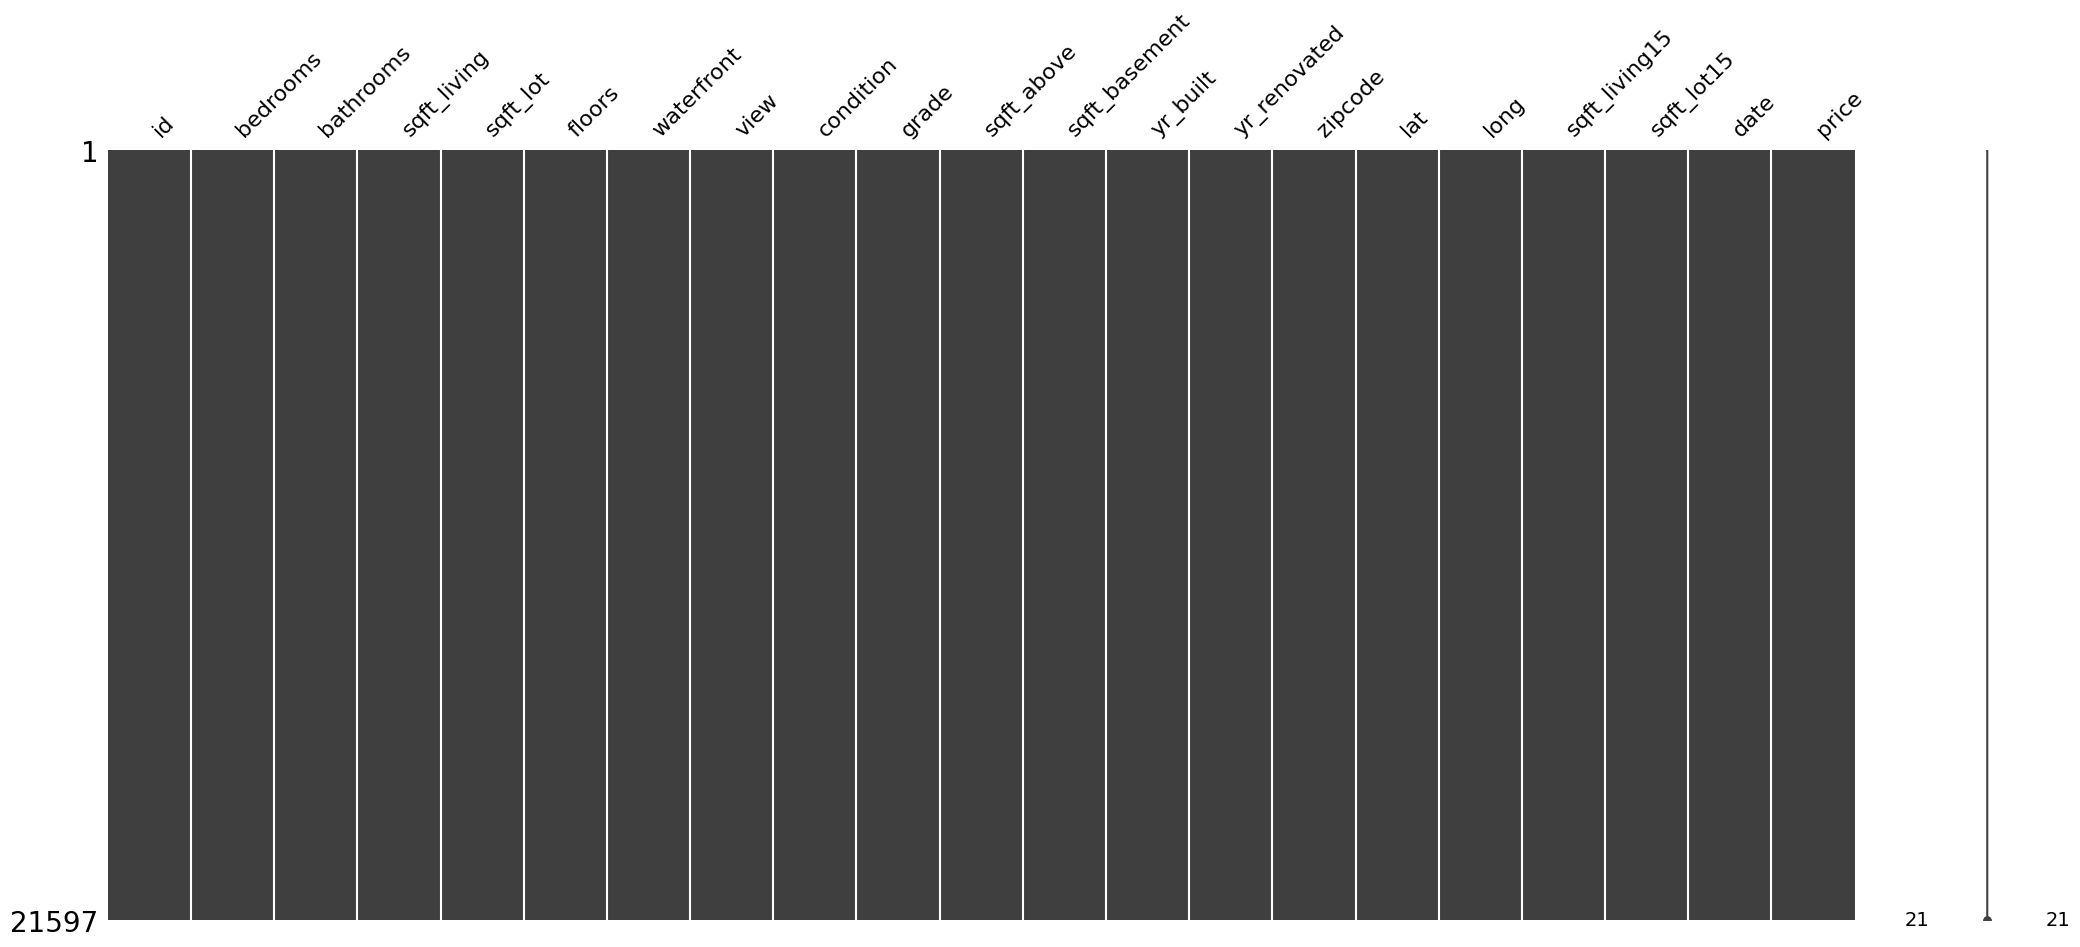

In [86]:
msno.matrix(df_overview)

In [104]:
corr = df_overview.corr()
corr['price'].sort_values()

zipcode         -0.053402
id              -0.016772
date            -0.003998
long             0.022037
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.117855
floors           0.256804
waterfront       0.264086
lat              0.306692
bedrooms         0.308787
sqft_basement    0.321066
view             0.393497
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

## Check for relations and correlations

<Axes: >

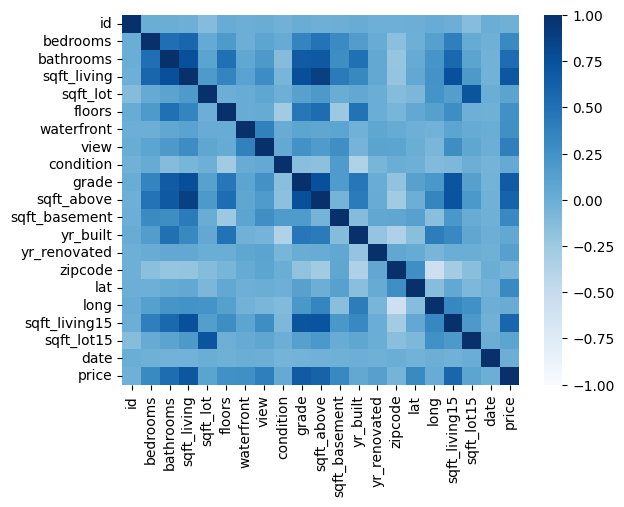

In [98]:
sns.heatmap(corr, cmap = 'Blues' ,  vmin=-1, vmax=1)

## check for geographic distribution

In [99]:


map_zipcode = df_overview.groupby('zipcode')[['lat','long', 'price']].mean()
map_zipcode['price'] = map_zipcode['price'].astype(int)
# Calculate the center of the map (average lat/lon)
center_lat = map_zipcode['lat'].mean()
center_lon = map_zipcode['long'].mean()
# Create the map centered at the calculated coordinates
m3 = folium.Map(location=[center_lat, center_lon], zoom_start=12)
# Loop through each row to add a marker for each zipcode with mean sale price as label
for _, row in map_zipcode.iterrows():
    # Format the price as an integer
    price = row['price']
    # Create a subtle grey circle marker
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=6,  # Size of the circle
        color='gray',  # Circle border color (grey)
        fill=True,  # Fill the circle
        fill_color='gray',  # Fill color (grey)
        fill_opacity=0.6,  # Transparency of the marker
    ).add_to(m3)
    # Create a permanent label
    folium.Marker(
            location=[row['lat'], row['long']],
            icon=folium.DivIcon(html=f'''
                <div style="font-size: 14px; color: black; font-weight: bold;
                    position: absolute; left: 8px; top: -18px;">
                    {price}0&nbsp$
                </div>
            '''),
            popup=None  # No popup required
        ).add_to(m3)
# Save the map to a HTML file
m3.save("zipcode_price_map.html")
# Display the map (if in Jupyter notebook)
m3

<Axes: >

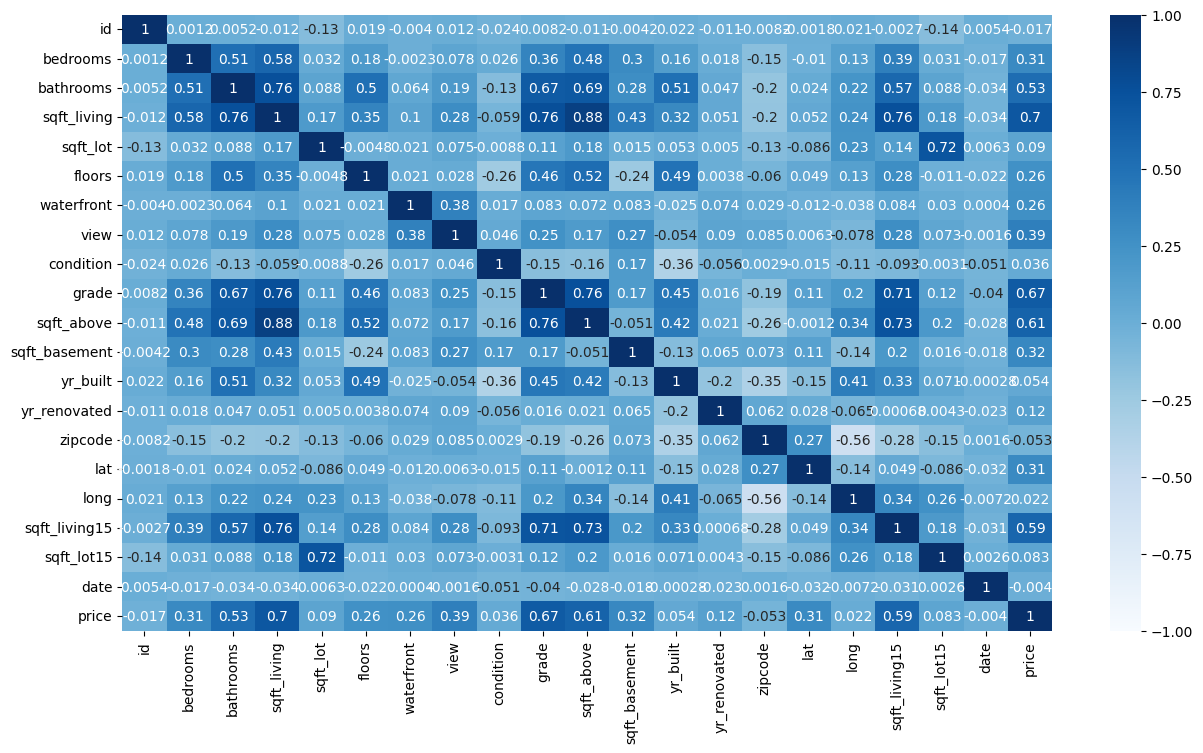

In [101]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap = 'Blues' ,  vmin=-1, vmax=1, annot=True)

## other variables

In [105]:
df_overview['grade'].value_counts()

grade
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: count, dtype: int64

<Axes: xlabel='grade', ylabel='price'>

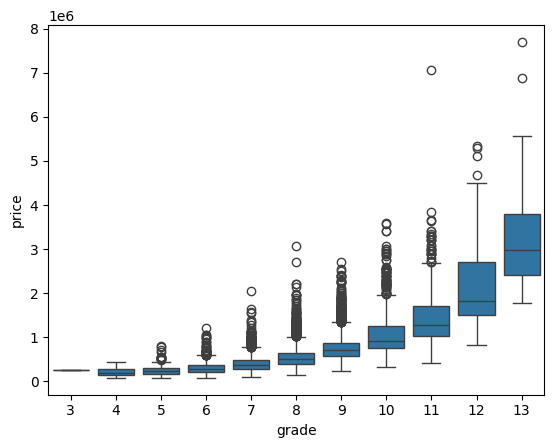

In [108]:

sns.boxplot(x='grade', y='price', data=df_overview)

<Axes: xlabel='sqft_living', ylabel='price'>

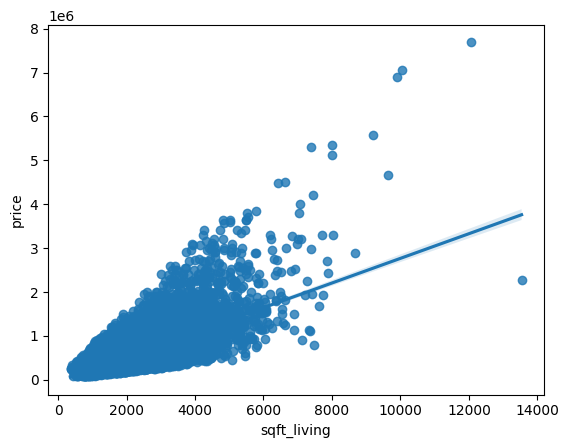

In [110]:
sns.regplot(x='sqft_living',y='price', data=df_overview)

In [123]:
# saving the info so far
df_overview.to_csv('data/df_sofar.csv')

In [159]:
# what is it the correlation between location and price?  
# exploring the zip codes as location
# zipcodes from the web show discrepancies on number of zip codes in the dataframe
df_zip_AreaName = pd.read_csv('data/ZipCode_AreaName.csv')
df_zip_AreaName.head()

,ZIP Code,Area Name
0,98101,Downtown Seattle
1,98102,Capitol Hill/Eastlake
2,98103,Fremont/Green Lake
3,98104,International District
4,98105,University District


In [141]:
#create array of unique zip codes to obtain the neigborhood associated using a public dB
zip_df = df_overview['zipcode'].unique()

In [142]:
#pgeocode provides information from postal codes

import pgeocode


In [ ]:
# Initialize the Nominatim object for USA ('US')
nomi = pgeocode.Nominatim('US')
#querying informaton about all the zipcodes in the df
zip_info = nomi.query_postal_code(zip_df.astype(str))
zip_info.tail(35)
# almost have of the zipcodes in the data have no associated area name with the public db used so far
# instead of spending more time trying to associate the 70 zip codes in the data with its geographic location or area name
# I will see if using the map I can color code the lables and explore correlations based on geographic location

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
35,98008,US,Bellevue,Washington,WA,King,33.0,NaN,NaN,47.6115,-122.1162,4.0
36,98059,US,Renton,Washington,WA,King,33.0,NaN,NaN,47.5058,-122.1157,4.0
37,98122,US,Seattle,Washington,WA,King,33.0,NaN,NaN,47.6116,-122.3056,4.0
38,98144,US,Seattle,Washington,WA,King,33.0,NaN,NaN,47.5846,-122.3005,4.0
39,98004,US,Bellevue,Washington,WA,King,33.0,NaN,NaN,47.6155,-122.2072,4.0
40,98005,US,Bellevue,Washington,WA,King,33.0,NaN,NaN,47.6150,-122.1663,4.0
41,98034,US,Kirkland,Washington,WA,King,33.0,NaN,NaN,47.7188,-122.1966,4.0
42,98075,US,Sammamish,Washington,WA,King,33.0,NaN,NaN,47.5857,-122.0345,4.0
43,98116,US,Seattle,Washington,WA,King,33.0,NaN,NaN,47.5746,-122.3934,4.0
44,98010,US,Black Diamond,Washington,WA,King,33.0,NaN,NaN,47.3114,-122.0053,4.0


In [233]:
#map creation
map_zipcode = df_overview.groupby('zipcode')[['lat','long', 'price']].mean()
map_zipcode['price'] = map_zipcode['price'].astype(int)
# Calculate the center of the map (average lat/lon)
center_lat = map_zipcode['lat'].mean()
center_lon = map_zipcode['long'].mean()
# Create the map centered at the calculated coordinates
m3 = folium.Map(location=[center_lat, center_lon], zoom_start=12)
# Loop through each row to add a marker for each zipcode with mean sale price as label
for _, row in map_zipcode.iterrows():
    # Format the price as an integer
    price = row['price']
    # Create a subtle grey circle marker
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=(price/50000),  # Size of the circle
        color='grey',  # Circle border color (grey)
        fill=True,  # Fill the circle
        #get the max price and compare to the price of this area, obtain a ratio from 0 to 1
        # transform that to hex
        #use that for a color coded
        fill_color=("#{:06x}".format(price.astype(int) % (1 << 24))),  # Fill color
        fill_opacity=0.6,  # Transparency of the marker
    ).add_to(m3)
    # Create a permanent label
    folium.Marker(
            location=[row['lat'], row['long']],
            icon=folium.DivIcon(html=f'''
                <div style="font-size: 14px; color: black; font-weight: bold;
                    position: absolute; left: 8px; top: -18px;">
                    {round(price/1000,2)}0&nbsp$
                </div>
            '''),
            popup=None  # No popup required
        ).add_to(m3)
# Save the map to a HTML file
m3.save("zipcode_price_map.html")
# Display the map (if in Jupyter notebook)
m3

In [235]:
m3.save('data/zipcode_price_map.html')



(19250.0, 20250.0)

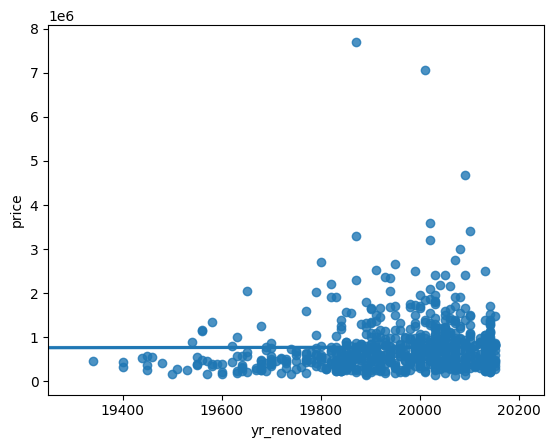

In [240]:
ax = sns.regplot(x='yr_renovated',y='price', data=df_overview, )
ax.set_xlim(19250,20250)

C:\Users\email\AppData\Local\Temp\ipykernel_15580\1646685377.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


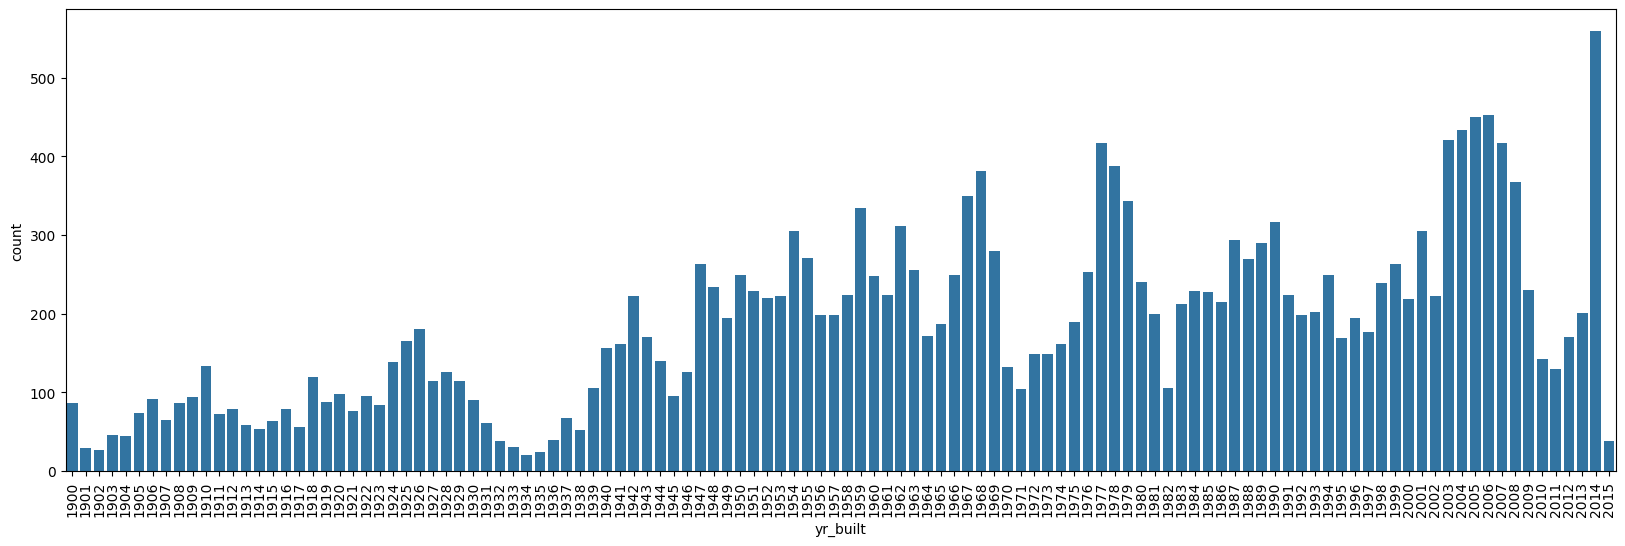

In [267]:

plt.rcParams['figure.figsize'] = (20,6)
ax = sns.barplot(df_overview['yr_built'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()
#df_overview['yr_built'].value_counts()
